In [13]:
from rhessys import utilities as rut

In [1]:
header = ['date','year','doy','dor','solar_rad','wind_speed', 'wind_dir','wind_gust_speed','Tave','Tmax','Tmin','RHave','RHmax','RHmin','Pressure','P']

In [2]:
data = pd.read_table('./data/jemez_raws/jemez_raws_wy2003_2015_pressure_RH.txt', delim_whitespace=True, skiprows=6, names=header, na_values=-9999)
data.index = pd.DatetimeIndex(data.date)

In [3]:
data.head()

,date,year,doy,dor,solar_rad,wind_speed,wind_dir,wind_gust_speed,Tave,Tmax,Tmin,RHave,RHmax,RHmin,Pressure,P
2002-10-01,10/01/2002,2002,274,1,3.491,1.58,131,6.71,10.4,17.2,5.6,67,96,36,NaN,2.29
2002-10-02,10/02/2002,2002,275,2,5.522,2.27,173,8.94,10.8,17.2,4.4,63,97,27,NaN,2.03
2002-10-03,10/03/2002,2002,276,3,4.824,3.34,247,12.96,5.6,10.0,0.6,55,80,21,NaN,0.00
2002-10-04,10/04/2002,2002,277,4,5.941,1.79,103,6.71,5.5,14.4,-3.9,49,82,27,NaN,0.00
2002-10-05,10/05/2002,2002,278,5,5.648,1.81,131,8.49,8.8,17.2,0.0,40,64,21,NaN,0.00


In [4]:
data.tail()

,date,year,doy,dor,solar_rad,wind_speed,wind_dir,wind_gust_speed,Tave,Tmax,Tmin,RHave,RHmax,RHmin,Pressure,P
2014-09-26,09/26/2014,2014,269,4379,4.932,1.30,165,5.81,14.0,22.2,7.2,78,100,48,NaN,0.25
2014-09-27,09/27/2014,2014,270,4380,3.990,1.27,193,6.71,14.2,21.7,10.0,72,93,44,NaN,0.00
2014-09-28,09/28/2014,2014,271,4381,2.074,1.60,183,6.71,13.0,18.9,10.6,78,90,53,NaN,1.78
2014-09-29,09/29/2014,2014,272,4382,2.666,1.77,180,11.62,10.3,16.1,4.4,73,99,40,NaN,4.06
2014-09-30,09/30/2014,2014,273,4383,5.280,2.55,347,9.39,9.1,15.6,3.9,49,65,31,NaN,0.00


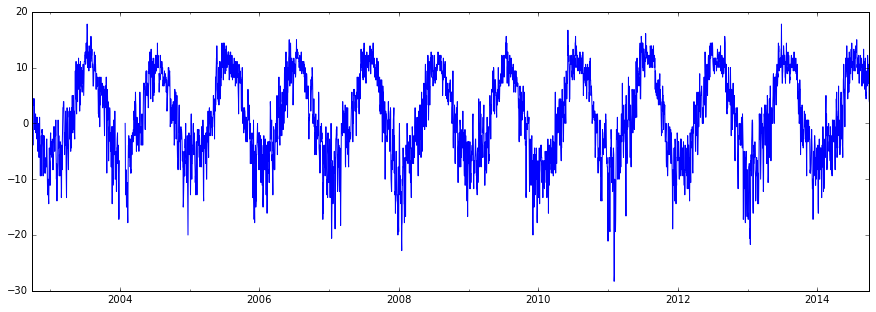

In [18]:
plt.figure(figsize=(15,5))
data.Tmin.plot()

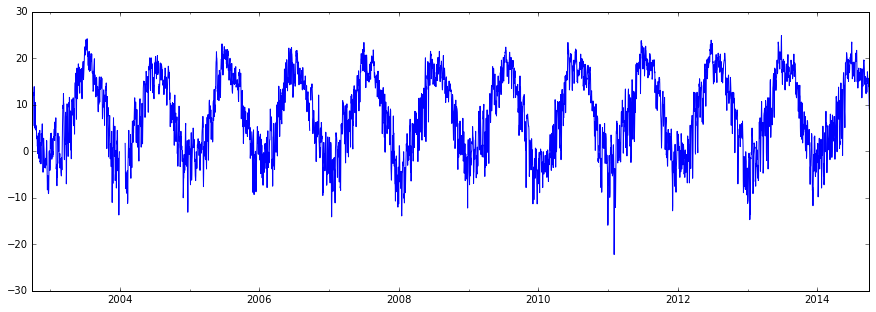

In [19]:
plt.figure(figsize=(15,5))
data.Tave.plot()

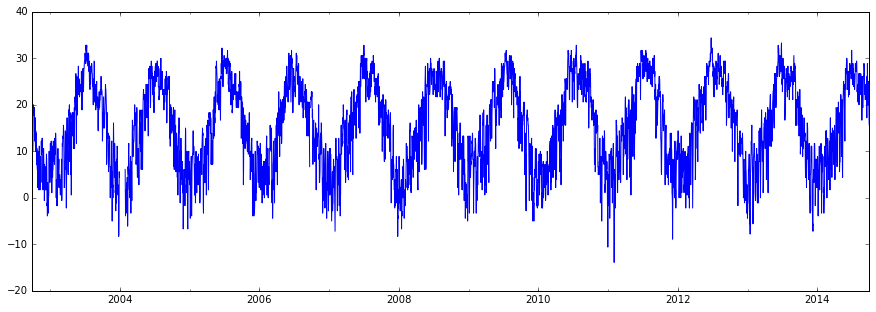

In [20]:
plt.figure(figsize=(15,5))
data.Tmax.plot()

In [14]:
data.to_pickle('./data/Jemez_raws.pcl')

In [17]:
data2 = data.groupby(by='doy').mean()

In [129]:
data.describe()

,year,doy,dor,solar_rad,wind_speed,wind_dir,wind_gust_speed,Tave,Tmax,Tmin,RHave,RHmax,RHmin,Pressure,P
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,0,4383.000000
mean,2008.247775,183.125257,2192.000000,4.776978,2.028358,173.247433,8.935915,7.847285,15.389060,1.176112,50.932695,74.691421,28.863107,NaN,1.819723
std,3.479513,105.450673,1265.407444,2.269096,0.650786,119.919432,2.947850,8.368877,9.234017,7.670665,21.200431,22.307243,17.529231,NaN,36.350380
min,2002.000000,1.000000,1.000000,0.001000,0.000000,0.000000,0.000000,-22.200000,-13.900000,-28.300000,8.000000,14.000000,0.000000,NaN,0.000000
25%,2005.000000,92.000000,1096.500000,2.963500,1.560000,55.000000,6.710000,0.900000,7.800000,-4.400000,34.000000,58.000000,16.000000,NaN,0.000000
50%,2008.000000,183.000000,2192.000000,4.817000,1.900000,159.000000,8.490000,8.000000,15.600000,1.100000,49.000000,79.000000,25.000000,NaN,0.000000
75%,2011.000000,274.000000,3287.500000,6.508500,2.330000,297.000000,10.730000,15.300000,23.300000,8.300000,67.000000,96.000000,38.000000,NaN,0.250000
max,2014.000000,366.000000,4383.000000,9.593000,5.200000,360.000000,26.380000,24.900000,34.400000,17.800000,100.000000,100.000000,100.000000,NaN,2394.000000


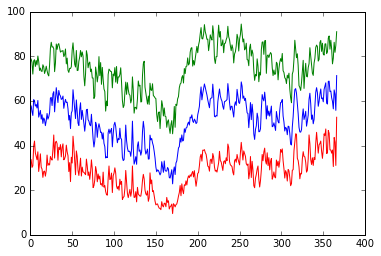

In [20]:
plt.plot(data2.RHave)
plt.plot(data2.RHmax)
plt.plot(data2.RHmin)

In [15]:
from scipy.optimize import curve_fit

In [54]:
def sincurve(times,x0,x1,x2):
    return x0*np.sin(times+x1) + x2

In [55]:
def fit_sincurve(times,vals):
    popt,pcov = curve_fit(sincurve,times,vals) # fit for x0,x1,x2
    
    x0 = popt[0]
    x1 = popt[1]
    x2 = popt[2]
    
    return x0,x1,x2    

In [56]:
fit_sincurve(times,vals)

(36.002901692944867, 4.0488897605986551, 54.528888306402621)

In [57]:
x0,x1,x2 = fit_sincurve(times,vals)

(0, 100)

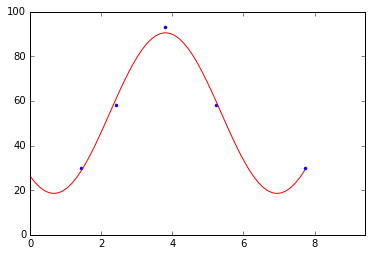

In [60]:
X = np.arange(0,30.0,0.5)
X /=12.
X *= np.pi
plt.plot(times,vals,'.')
plt.plot(X,sincurve(X,x0,x1,x2),'-r')
plt.xlim(0,3*np.pi)
plt.ylim(0,100)

In [112]:
def disagregate_cos(RHmin,RHave,RHmax,date):
    
    '''Disagregate Daily meteorological data using a cosine curve and the min, max, and average values of
    the variable over the day. This assumes constant timing about when the min, max, and mean values occur
    during the day.'''
    
    times = np.array([5.5,9.25,14.5,20.0,29.5])
    times /= 12.
    times *= np.pi
    vals = np.array([RHmin,RHave,RHmax,RHave,RHmin])
    
    x0,x1,x2 = fit_sincurve(times,vals)
    
    X = np.arange(0,24,1)/12.*np.pi
    
    Y = sincurve(X,x0,x1,x2)
    
    X /= np.pi
    X *= 12. # transfom back to hours
    
    return str(date.date()),X,Y

In [113]:
data.interpolate(inplace=True)

In [114]:
new_df = pd.DataFrame()

for i in np.arange(0,len(data)):
    
    date,X,RH = disagregate_cos(data.ix[i,'RHmin'],data.ix[i,'RHave'],data.ix[i,'RHmax'],data.index[i])
    date,X,Temp = disagregate_cos(data.ix[i,'Tmin'],data.ix[i,'Tave'],data.ix[i,'Tmax'],data.index[i])
    
    tmp = pd.DataFrame({'time':X,'AT':Temp,'RH':RH})
    tmp['date'] = date
    
    new_df = new_df.append(tmp)
    

In [115]:
def get_dt(df):
    date = df.date
    time = int(df.time)
    
    dt = pd.datetime.strptime('%s %s'%(date,time),'%Y-%m-%d %H')
    
    return str(dt)

In [116]:
new_df['dt'] = new_df.apply(get_dt,axis=1)

In [118]:
new_df.index = pd.DatetimeIndex(new_df.dt)

In [119]:
new_df.loc[new_df.RH > 100,'RH'] = 100.
new_df.loc[new_df.RH<0,'RH'] = 0.

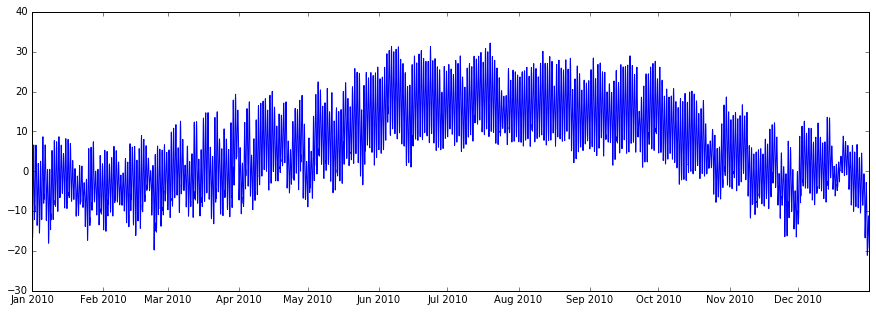

In [123]:
plt.figure(figsize=(15,5))
plt.plot(new_df['2010-1-1':'2010-12-31'].AT)

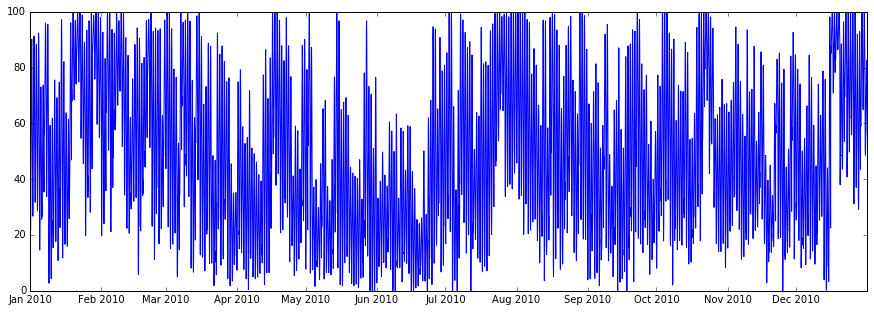

In [124]:
plt.figure(figsize=(15,5))
plt.plot(new_df['2010-1-1':'2010-12-31'].RH)

In [126]:
new_df.to_pickle('./data/jemez_hourly_RH_TA_2002_2015.pcl')